![alternative text](../../data/pca_chatgpt.png)

Mathematically, PCA involves finding the eigenvectors and eigenvalues of the covariance matrix of the original dataset. The eigenvectors become the principal components, and the eigenvalues indicate the amount of variance explained by each principal component.

1 - Standardizing the data to have zero mean and unit variance.

2- Computing the covariance matrix of the standardized data.

3- Finding the eigenvectors and eigenvalues of the covariance matrix.

4- Sorting the eigenvectors in descending order of eigenvalues.

5- Selecting a subset of the top eigenvectors based on the desired dimensionality reduction.

6- Projecting the data onto the selected principal components to obtain a reduced-dimensional representation.

In [318]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

# Load the Olivetti Faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42) # these are 64x64 gray scale images
X = data.data  # Image data (400 samples, each flattened into a 1D array)
y = data.target

In [319]:
print(f"number of samples {X.shape[0]} and number of features {X.shape[1]}")

number of samples 400 and number of features 4096


In [320]:
def visualize(X,y):
    # Visualize a few original faces (optional)
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(X[i].reshape(64, 64), cmap=plt.cm.gray)
        ax.set_title(f"Person {y[i]}")
    plt.show()

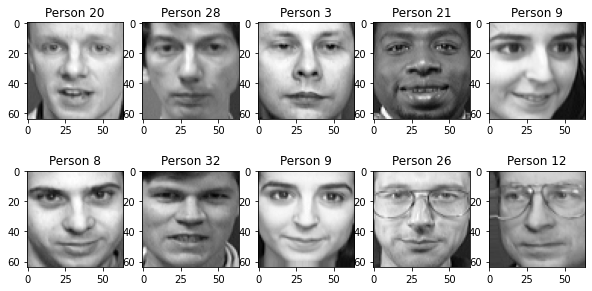

In [321]:
# Visualize a few original faces
visualize(X,y)

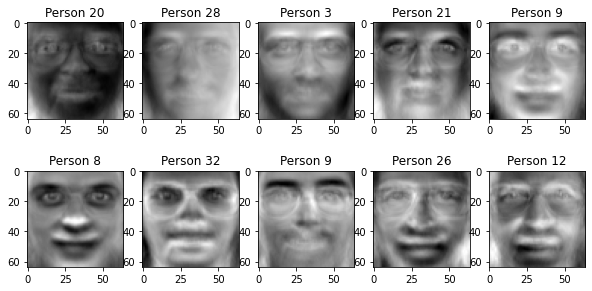

In [322]:
# Perform PCA for dimensionality reduction
n_components = 10  # Number of principal components to retain
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(X)

# Visualize the first few principal components as eigenfaces (optional)
eigenfaces = pca.components_.reshape((n_components, 64, 64))
visualize(np.clip(eigenfaces,-1,1),y)

# now let's implement PCA in numpy

In [323]:
def normalize(X):
    mu = np.mean(X,axis= 0) # avg over samples
    std = np.std(X,axis= 0) # avg over samples
    return (X - mu)

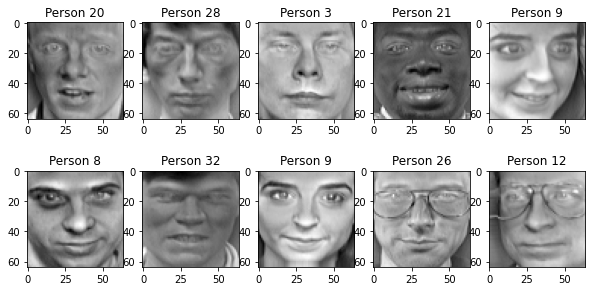

In [324]:
# normalized features
X_norm = normalize(X)
visualize(X_norm,y)

In [333]:
def calculate_covariance_matrix(centered_data):
    """
    Calculate the covariance matrix of the input data.

    Parameters:
    data (numpy.ndarray): A 2D NumPy array where each row is an observation, and each column is a feature.

    Returns:
    numpy.ndarray: The covariance matrix of the input data.
    """
    # Calculate the number of observations (rows)
    num_observations = centered_data.shape[0]

    # Calculate the covariance matrix
    covariance_matrix = np.dot(centered_data.T, centered_data) / (num_observations - 1)

    return covariance_matrix


The diagonal elements of the covariance matrix represent the variances of individual features.

Off-diagonal elements represent the covariances between pairs of features. 

Positive values indicate a positive relationship (when one feature increases, the other tends to increase), while negative values indicate a negative relationship (when one feature increases, the other tends to decrease).

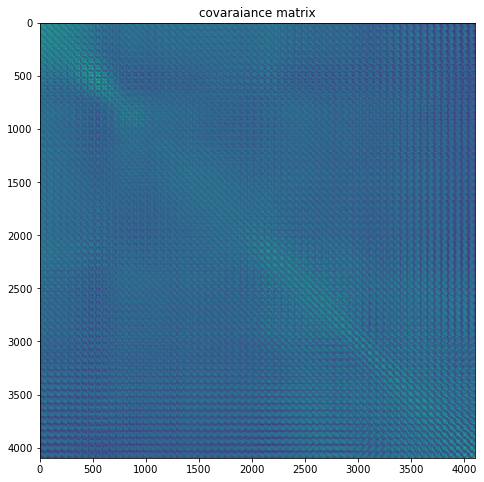

In [334]:
covaraiance = calculate_covariance_matrix(X_norm)
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
plt.imshow(covaraiance)
plt.title("covaraiance matrix")
plt.show()

To find the eigenvalues (λ) of a matrix A, you need to solve the characteristic equation:

det(A - λI) = 0

E-Values: 

    Eigenvalues represent the amount of variance explained by each corresponding eigenvector (principal component). Eigenvalues are always non-negative.

E-Vectors: 

    Eigenvectors are the direction vectors associated with each eigenvalue. The eigenvectors are orthogonal (perpendicular) to each other, meaning they are uncorrelated. This property is why PCA can be used for dimensionality reduction and decorrelation of features.

    The eigenvector corresponding to the largest eigenvalue points in the direction of maximum variance in the data, while the subsequent eigenvectors point in the direction of decreasing variance.

PCA: 

    Larger eigenvalues correspond to principal components that capture more variance in the data, while smaller eigenvalues correspond to components that capture less variance. They indicate how much of the total variance in the data is captured by each principal component.
    
    You can use eigenvalues to decide how many principal components to retain in PCA. Typically, you'll want to keep the top k principal components that capture a high percentage (e.g., 95% or 99%) of the total variance. This allows you to reduce the dimensionality of your data while retaining most of the important information.

    Eigenvector represents a principal component, which is a linear combination of the original features. Each eigenvector (principal component) represents a direction in the feature space. These directions can be interpreted as patterns or combinations of features that capture the most significant variance in the data.

Text(0.5, 1.0, 'Eigen values')

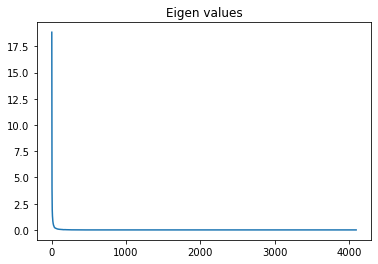

In [335]:
eigenvalues, eigenvectors = np.linalg.eig(covaraiance) # already sorted by eigen values
plt.plot(eigenvalues)  
plt.title("Eigen values") 

In [336]:
cumsum = np.cumsum(eigenvalues)

percent_energy = np.sum(eigenvalues) * 0.9

for idx, csum in enumerate(cumsum[1:]):
    if csum > percent_energy:
        print(idx)
        break

64


In [337]:
# for visualization purposes, we'll go with 10 
num_eigen_values = 10
top_eigen_vectors = eigenvectors[:,0:num_eigen_values]
top_eigen_values  = eigenvalues[0:num_eigen_values]
X_pca = np.dot(X_norm, top_eigen_vectors)

Let's reconstruct faces based on the top 10 eigen vectors

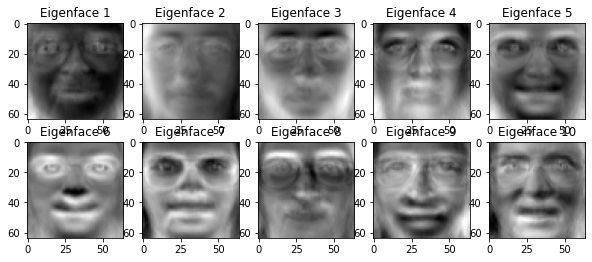

In [338]:
eigenfaces = top_eigen_vectors.T.reshape((num_eigen_values, 64, 64))
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(np.real(eigenfaces[i]), cmap=plt.cm.gray)
    ax.set_title(f"Eigenface {i + 1}")
plt.show()